In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

# 小数第３まで表示
%precision 3

'%.3f'

In [2]:
#ファイルの読み込み
data=pd.read_csv('data_datetime.csv',parse_dates=[0])
data0=data
#factor1がunspecifiedな行を削除
data=data[data['CONTRIBUTING FACTOR VEHICLE 1'] !='Unspecified']
data_AllMonth=data0[(data0['DATETIME'].dt.year==2013)|\
                  (data0['DATETIME'].dt.year==2014)|\
                  (data0['DATETIME'].dt.year==2015)|\
                  (data0['DATETIME'].dt.year==2016)]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
list_Cont=list((data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().index)[:20])
list_Street=list((data['ON STREET NAME'].value_counts().index)[:1000])
list_Vehicle=list((data['VEHICLE TYPE CODE 1'].value_counts().index)[:13])

In [5]:
#日時のカラム化、少数の事故原因・車種をohtersに、
data4=data
data4['hour']=data['DATETIME'].dt.hour
data4['month']=data['DATETIME'].dt.month
data4['weekday']=data['DATETIME'].dt.weekday
data4['CONTRIBUTING FACTOR']=data4['CONTRIBUTING FACTOR VEHICLE 1'].apply( lambda x: x if x in list_Cont else 'Ohters')
data4['VEHICLE TYPE']=data4['VEHICLE TYPE CODE 1'].apply(lambda x: x if x in list_Vehicle else 'Ohters')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [54]:
#歩行者・自転車被害者　と　自動車被害者　を識別するカラム生成
data5=data4
data5['dam_Ped']=((data5['NUMBER OF PEDESTRIANS INJURED'] > 0) | (data5['NUMBER OF PEDESTRIANS KILLED']>0)\
                   |(data5['NUMBER OF CYCLIST INJURED']>0) | (data5['NUMBER OF CYCLIST KILLED']>0)).astype(int)
data5['dam_Ped_only']=((data5['NUMBER OF PEDESTRIANS INJURED'] > 0) | (data5['NUMBER OF PEDESTRIANS KILLED']>0)).astype(int)
data5['dam_Car']=((data5['NUMBER OF MOTORIST INJURED'] > 0) | (data5['NUMBER OF MOTORIST KILLED']>0)).astype(int)
data5['dam']=((data5['NUMBER OF PERSONS INJURED'] > 0) | (data5['NUMBER OF PERSONS KILLED']>0)).astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [ ]:
data6.[]

In [55]:
data5.dam_Ped.value_counts()
data5.dam_Car.value_counts()
data5.dam.value_counts()

0    463323
1    114271
Name: dam, dtype: int64

In [44]:
pv=data5[data5['VEHICLE TYPE CODE 1']=='PASSENGER VEHICLE']
pv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306004 entries, 2 to 1137848
Data columns (total 36 columns):
DATETIME                         306004 non-null datetime64[ns]
BOROUGH                          206200 non-null object
ZIP CODE                         206168 non-null object
LATITUDE                         251420 non-null float64
LONGITUDE                        251420 non-null float64
LOCATION                         251420 non-null object
ON STREET NAME                   236486 non-null object
CROSS STREET NAME                219933 non-null object
OFF STREET NAME                  41774 non-null object
NUMBER OF PERSONS INJURED        306004 non-null int64
NUMBER OF PERSONS KILLED         306004 non-null int64
NUMBER OF PEDESTRIANS INJURED    306004 non-null int64
NUMBER OF PEDESTRIANS KILLED     306004 non-null int64
NUMBER OF CYCLIST INJURED        306004 non-null int64
NUMBER OF CYCLIST KILLED         306004 non-null int64
NUMBER OF MOTORIST INJURED       306004 non-n

In [45]:
pv['la'] = pv['LATITUDE'].map(lambda x : round(float(x),3))
pv['lo'] = pv['LONGITUDE'].map(lambda x : round(float(x),3))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
pv_YRW=pv[pv['CONTRIBUTING FACTOR']=='Failure to Yield Right-of-Way']
pv_TI=pv[pv['CONTRIBUTING FACTOR']=='Turning Improperly']
pv_TI_freq=pv_TI[(((pv_TI['month']==3)|(pv_TI['month']==4))|(pv_TI['month']==9)|(pv_TI['month']==10))&\
                   ((pv_TI['hour']<19)&(pv_TI['hour']>=14))]
pv_TI_freq_drop_lo=pv_TI_freq.dropna(subset=['lo'])
pv_TI_freq_drop_lalo=pv_TI_freq_drop_lo.dropna(subset=['la'])

In [30]:
#全事故（unspecified含む）の月ごとの事故数抽出
data_AllMonth['month']=data_AllMonth['DATETIME'].dt.month
month=data_AllMonth['month'].value_counts().sort_index()
month_pv=pv['month'].value_counts().sort_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


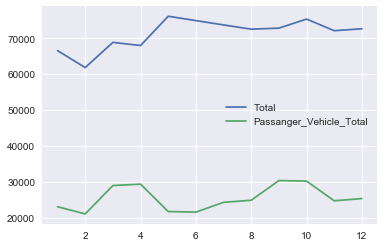

In [31]:
x=np.arange(1,13)
ax=plt.plot(x,month,label='Total');
plt.plot(x,pv['month'].value_counts().sort_index() ,label='Passanger_Vehicle_Total');
#plt.plot(x,pv_YRW['month'].value_counts().sort_index())
plt.legend()

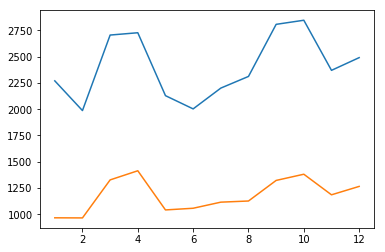

In [71]:
plt.plot(x,pv_YRW['month'].value_counts().sort_index(),label='Passanger_Vehicle_YRW')
plt.plot(x,pv_TI['month'].value_counts().sort_index(),label='Passanger_Vehicle_TI')

In [37]:
pv['CONTRIBUTING FACTOR'].value_counts()

Driver Inattention/Distraction          87285
Failure to Yield Right-of-Way           28852
Fatigued/Drowsy                         26677
Ohters                                  23490
Backing Unsafely                        18241
Other Vehicular                         17168
Turning Improperly                      14164
Following Too Closely                   13384
Lost Consciousness                       9875
Traffic Control Disregarded              8796
Prescription Medication                  8177
Driver Inexperience                      8001
Pavement Slippery                        6120
Passing or Lane Usage Improper           6055
Outside Car Distraction                  5766
Alcohol Involvement                      5674
Unsafe Lane Changing                     5476
Physical Disability                      5382
Reaction to Other Uninvolved Vehicle     2780
View Obstructed/Limited                  2695
Oversized Vehicle                        1946
Name: CONTRIBUTING FACTOR, dtype: 

In [120]:
Cont_Total_Street=data.dropna(subset=['ON STREET NAME'])['CONTRIBUTING FACTOR VEHICLE 1'].count()
Cont_Street=pd.DataFrame(data['ON STREET NAME'].value_counts().sort_index())[1:]

In [38]:
pv_TI_freq.count()

DATETIME                         1875
BOROUGH                          1169
ZIP CODE                         1168
LATITUDE                         1432
LONGITUDE                        1432
LOCATION                         1432
ON STREET NAME                   1463
CROSS STREET NAME                1370
OFF STREET NAME                   352
NUMBER OF PERSONS INJURED        1875
NUMBER OF PERSONS KILLED         1875
NUMBER OF PEDESTRIANS INJURED    1875
NUMBER OF PEDESTRIANS KILLED     1875
NUMBER OF CYCLIST INJURED        1875
NUMBER OF CYCLIST KILLED         1875
NUMBER OF MOTORIST INJURED       1875
NUMBER OF MOTORIST KILLED        1875
CONTRIBUTING FACTOR VEHICLE 1    1875
CONTRIBUTING FACTOR VEHICLE 2    1826
CONTRIBUTING FACTOR VEHICLE 3      74
CONTRIBUTING FACTOR VEHICLE 4      18
CONTRIBUTING FACTOR VEHICLE 5       8
UNIQUE KEY                       1875
VEHICLE TYPE CODE 1              1875
VEHICLE TYPE CODE 2              1716
VEHICLE TYPE CODE 3                68
VEHICLE TYPE

## pv_TI 歩行者被害が起こった場所

(40.450, 41)

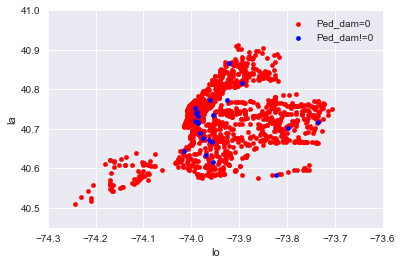

In [41]:
ax=pv_TI_freq_drop_lalo[pv_TI_freq_drop_lalo['dam_Ped']==0].plot.scatter(x='lo', y='la', color='red', label='Ped_dam=0');
pv_TI_freq_drop_lalo[pv_TI_freq_drop_lalo['dam_Ped']==1].plot.scatter(x='lo', y='la', color='blue',label='Ped_dam!=0',ax=ax);
plt.xlim(-74.3, -73.6)
plt.ylim(40.45, 41)

(40.450, 41)

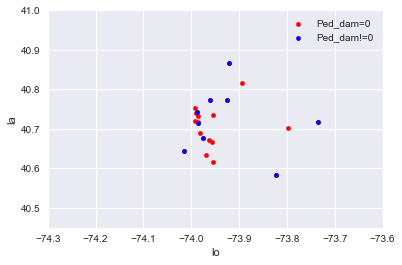

In [48]:
ax=pv_TI_freq_drop_lalo[pv_TI_freq_drop_lalo['dam_Ped']==1].plot.scatter(x='lo', y='la', color='red', label='Ped_dam=0');
pv_TI_freq_drop_lalo[pv_TI_freq_drop_lalo['dam_Ped_only']==1].plot.scatter(x='lo', y='la', color='blue',label='Ped_dam!=0',ax=ax);
plt.xlim(-74.3, -73.6)
plt.ylim(40.45, 41)

## pv_TI 自動車被害が起こった場所

(40.450, 41)

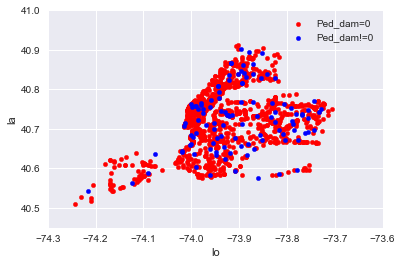

In [42]:
ax=pv_TI_freq_drop_lalo[pv_TI_freq_drop_lalo['dam_Car']==0].plot.scatter(x='lo', y='la', color='red', label='Ped_dam=0');
pv_TI_freq_drop_lalo[pv_TI_freq_drop_lalo['dam_Car']==1].plot.scatter(x='lo', y='la', color='blue',label='Ped_dam!=0',ax=ax);
plt.xlim(-74.3, -73.6)
plt.ylim(40.45, 41)

In [52]:
lo_x=pd.DataFrame(pv_TI_freq_drop_lo['lo'].value_counts().sort_index())
#lo_x.sort_values('lo', ascending=False)[:10]
#la_y=pd.DataFrame(pv_TI_freq['la'].value_counts())
lo_x.index

Float64Index([-74.244,  -74.23, -74.215,  -74.21, -74.209, -74.206, -74.181,
              -74.171,  -74.17, -74.169,
              ...
              -73.732, -73.731, -73.728, -73.727, -73.725, -73.724, -73.723,
              -73.715, -73.714, -73.706],
             dtype='float64', length=335)

In [132]:
lo_x

,lo
-74.244,1
-74.230,1
-74.215,1
-74.210,1
-74.209,1
-74.206,1
-74.181,1
-74.171,1
-74.170,3
-74.169,3


In [109]:
pd.DataFrame(pv_TI_freq['lo'].value_counts()).ix[:10,:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


KeyError: 10.0

In [ ]:
plt.plot(lo_x,la_y,label='Passanger_Vehicle_TI')

(40.450, 41)

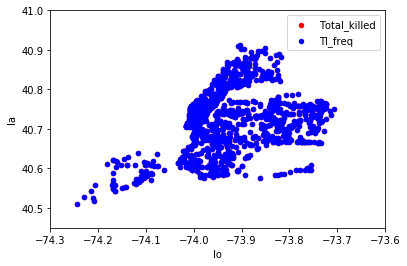

In [99]:
ax=pv_TI_freq.plot.scatter(x='lo', y='la', color='red', label='Total_killed');
pv_TI_freq.plot.scatter(x='lo', y='la', color='blue',label='TI_freq',ax=ax);
plt.xlim(-74.3, -73.6)
plt.ylim(40.45, 41)

In [74]:
def heatmap_dt(data):
    month_heatmap=pd.DataFrame(index=[])
    weekday_heatmap=pd.DataFrame(index=[])
    for i in range(24):
        #Series=data[data['hour']==i]['month'].value_counts().sort_index()
        month_heatmap=month_heatmap.append(data[data['hour']==i]['month'].value_counts().sort_index(),ignore_index = True)
        weekday_heatmap=weekday_heatmap.append(data[data['hour']==i]['weekday'].value_counts().sort_index(),ignore_index = True)
    sns.heatmap(month_heatmap.T,cmap="Blues")
    #sns.heatmap(weekday_heatmap.T,cmap="Blues")

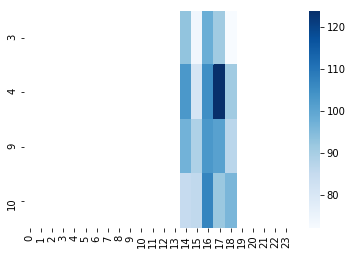

In [90]:
heatmap_dt(pv_TI_freq)

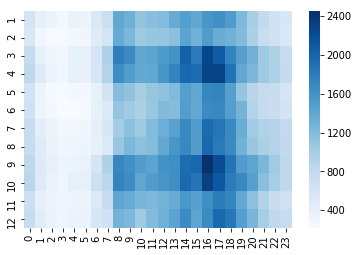

In [75]:
heatmap_dt(pv)

In [38]:
sns.heatmap(weekday.T,cmap="Blues")

NameError: name 'weekday' is not defined

In [ ]:
time = data.loc[:,['DATE','TIME']]

In [ ]:
location = data.loc[:,['la','lo']]

In [ ]:
vehicletype = data.loc[:,'VEHICLE TYPE CODE 1']

In [32]:
factor = data.loc['CONTRIBUTING FACTOR VEHICLE 1']

KeyError: 'the label [CONTRIBUTING FACTOR VEHICLE 1] is not in the [index]'

In [ ]:
data1 = pd.concat([time,location,vehicletype,factor], axis=1)

In [ ]:
data2 = data1[data1['VEHICLE TYPE CODE 1'] == 'TAXI']